<a href="https://colab.research.google.com/github/amalsalilan/IPL_Infographics_Data_Analytics_-_Data_Visualization_Infosys_Internship_Oct2024/blob/K_Akshya/Final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

In [ ]:
df=pd.read_csv('/content/deliveries.csv')
copy_data=df.copy()
df

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [ ]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batter,0
bowler,1
non_striker,1
batsman_runs,1


In [ ]:
df.shape

(71576, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71576 entries, 0 to 71575
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          71576 non-null  int64  
 1   inning            71576 non-null  int64  
 2   batting_team      71576 non-null  object 
 3   bowling_team      71576 non-null  object 
 4   over              71576 non-null  int64  
 5   ball              71576 non-null  int64  
 6   batter            71576 non-null  object 
 7   bowler            71575 non-null  object 
 8   non_striker       71575 non-null  object 
 9   batsman_runs      71575 non-null  float64
 10  extra_runs        71575 non-null  float64
 11  total_runs        71575 non-null  float64
 12  extras_type       4122 non-null   object 
 13  is_wicket         71575 non-null  float64
 14  player_dismissed  3557 non-null   object 
 15  dismissal_kind    3557 non-null   object 
 16  fielder           2564 non-null   object

In [ ]:
df.describe(include=['object', 'category'])

,batting_team,bowling_team,batter,bowler,non_striker,extras_type,player_dismissed,dismissal_kind,fielder
count,71576,71576,71576,71575,71575,4122,3557,3557,2564
unique,10,10,333,249,330,5,312,8,283
top,Chennai Super Kings,Royal Challengers Bangalore,SR Tendulkar,IK Pathan,SR Tendulkar,wides,SK Raina,caught,AC Gilchrist
freq,8959,8805,1704,1485,1989,2264,63,2048,57


In [ ]:
df.describe()

,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,71576.000000,71576.000000,71576.000000,71576.00000,71575.000000,71575.000000,71575.000000,71575.000000
mean,441277.571015,1.482075,9.116100,3.62384,1.193294,0.074104,1.267398,0.049696
std,74676.701271,0.500688,5.667123,1.81383,1.573875,0.367318,1.564395,0.217318
min,335982.000000,1.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000
25%,392202.000000,1.000000,4.000000,2.00000,0.000000,0.000000,0.000000,0.000000
50%,419141.000000,1.000000,9.000000,4.00000,1.000000,0.000000,1.000000,0.000000
75%,501249.000000,2.000000,14.000000,5.00000,1.000000,0.000000,1.000000,0.000000
max,548362.000000,4.000000,19.000000,10.00000,6.000000,5.000000,7.000000,1.000000


In [ ]:
pd.pivot_table(df,index="batting_team",aggfunc='count')

,ball,batsman_runs,batter,bowler,bowling_team,dismissal_kind,extra_runs,extras_type,fielder,inning,is_wicket,match_id,non_striker,over,player_dismissed,total_runs
batting_team,,,,,,,,,,,,,,,,
Chennai Super Kings,8959,8959,8959,8959,8959,398,8959,507,303,8959,8959,8959,8959,8959,398,8959
Deccan Chargers,8668,8668,8668,8668,8668,468,8668,450,339,8668,8668,8668,8668,8668,468,8668
Delhi Daredevils,7882,7882,7882,7882,7882,388,7882,435,286,7882,7882,7882,7882,7882,388,7882
Kings XI Punjab,8307,8307,8307,8307,8307,411,8307,490,310,8307,8307,8307,8307,8307,411,8307
Kochi Tuskers Kerala,1582,1582,1582,1582,1582,86,1582,105,57,1582,1582,1582,1582,1582,86,1582
Kolkata Knight Riders,7754,7754,7754,7754,7754,367,7754,475,259,7754,7754,7754,7754,7754,367,7754
Mumbai Indians,8541,8541,8541,8541,8541,428,8541,574,303,8541,8541,8541,8541,8541,428,8541
Pune Warriors,3134,3134,3134,3134,3134,161,3134,180,111,3134,3134,3134,3134,3134,161,3134
Rajasthan Royals,8107,8107,8107,8107,8107,409,8107,428,298,8107,8107,8107,8107,8107,409,8107


**Top 10 Batsmen by Runs Scored**

In [ ]:
most_runs = df.groupby('batter', as_index=False)['batsman_runs'].sum().sort_values(by='batsman_runs', ascending=False).head(10)
print(most_runs)

             batter  batsman_runs
631         V Kohli          8014
512        S Dhawan          6769
477       RG Sharma          6630
147       DA Warner          6567
546        SK Raina          5536
374        MS Dhoni          5243
30   AB de Villiers          5181
124        CH Gayle          4997
501      RV Uthappa          4954
282      KD Karthik          4843


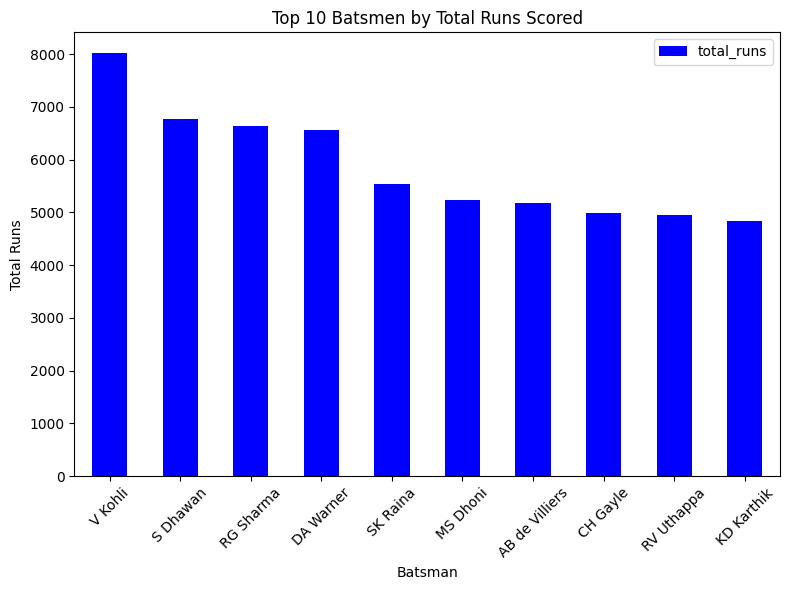

In [ ]:
batsman_runs = df.groupby('batter').agg(total_runs=('batsman_runs', 'sum'))

top_10_batsmen = batsman_runs.sort_values('total_runs', ascending=False).head(10)
top_10_batsmen.plot(kind='bar', figsize=(8, 6), color='blue')
plt.title('Top 10 Batsmen by Total Runs Scored')
plt.xlabel('Batsman')
plt.ylabel('Total Runs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Top Bowlers by Wickets**

In [ ]:
df.groupby(['bowler'])['is_wicket'].sum().sort_values(ascending=False).head(10)

,is_wicket
bowler,
YS Chahal,213
DJ Bravo,207
PP Chawla,201
SP Narine,200
R Ashwin,198
B Kumar,195
SL Malinga,188
A Mishra,183
JJ Bumrah,182


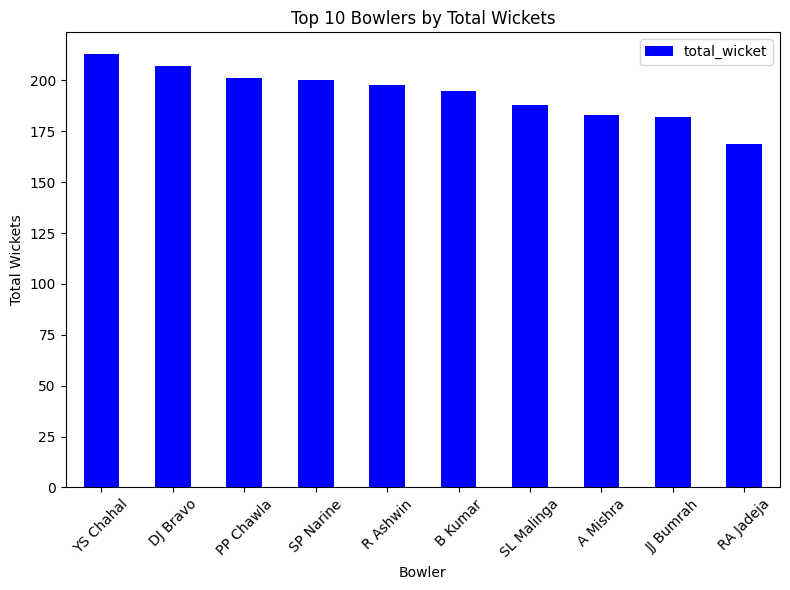

In [ ]:
bowler_wicket=df.groupby(by='bowler').agg(total_wicket=('is_wicket','sum'))
top_10_bowler=bowler_wicket.sort_values('total_wicket',ascending=False).head(10)
top_10_bowler.plot(kind='bar', color='blue', figsize=(8, 6))
plt.title('Top 10 Bowlers by Total Wickets')
plt.xlabel('Bowler')
plt.ylabel('Total Wickets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Run Distribution by Over**

In [ ]:
runs_over = df.groupby('over')['total_runs'].sum()
runs_over

,total_runs
over,
0,13651
1,16163
2,17895
3,18415
4,18565
5,18528
6,14839
7,15981
8,16639


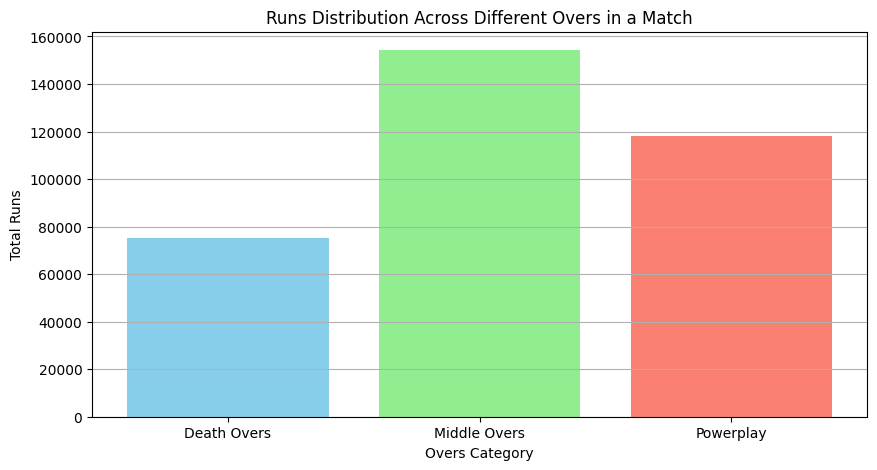

In [ ]:
def over_category(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle Overs'
    else:
        return 'Death Overs'


df['over_category'] = df['over'].apply(over_category)

runs_distribution = df.groupby('over_category')['total_runs'].sum().reset_index()


plt.figure(figsize=(10, 5))
plt.bar(runs_distribution['over_category'], runs_distribution['total_runs'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Runs Distribution Across Different Overs in a Match')
plt.xlabel('Overs Category')
plt.ylabel('Total Runs')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

**Extras Breakdown:**

In [ ]:
extras = df[df['extras_type'].isin(['wides', 'noballs', 'byes', 'legbyes'])]
specific_extras_break = extras['extras_type'].value_counts()
print(specific_extras_break)

extras_type
wides      8380
legbyes    4001
noballs    1069
byes        673
Name: count, dtype: int64


In [ ]:
extras_df = specific_extras_break.reset_index()
extras_df.columns = ['Extras Type', 'Count']

fig = px.pie(extras_df, values='Count', names='Extras Type',
             title='Breakdown of Specific Extras',
             color_discrete_sequence=['red', 'lightcoral', 'green', 'grey'])

fig.show()

**Distribution of extras correspond to batting team**

In [ ]:
extras_by_team = extras.groupby(['batting_team', 'extras_type']).size().unstack(fill_value=0)
print(extras_by_team)

extras_type                  byes  legbyes  noballs  wides
batting_team                                              
Chennai Super Kings            62      423      131    894
Deccan Chargers                33      156       45    237
Delhi Capitals                 17      138       46    349
Delhi Daredevils               49      314       64    565
Gujarat Lions                   7       63       16    111
Gujarat Titans                 12       77       28    196
Kings XI Punjab                83      396       67    671
Kochi Tuskers Kerala            7       26       11     61
Kolkata Knight Riders          78      479      111   1018
Lucknow Super Giants           12       70       19    230
Mumbai Indians                 78      498      124   1063
Pune Warriors                  10       90       23    145
Punjab Kings                   11      103       39    273
Rajasthan Royals               62      363      122    804
Rising Pune Supergiant          5       24        1     

<Figure size 800x600 with 0 Axes>

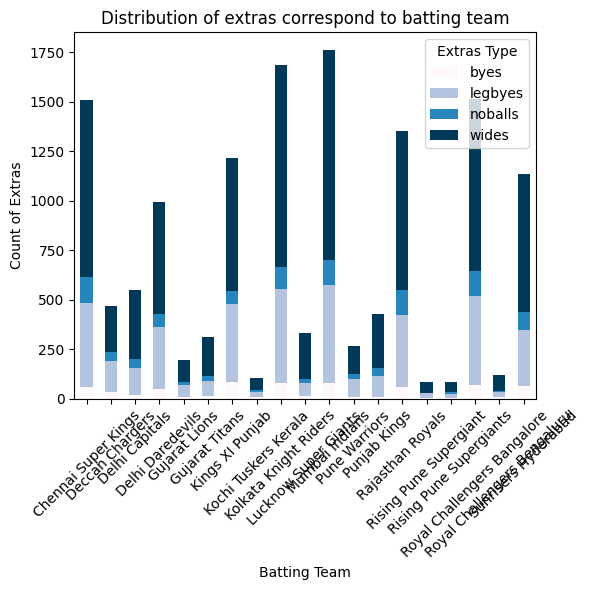

In [ ]:
plt.figure(figsize=(8, 6))

extras_by_team.plot(kind='bar', stacked=True, figsize=(6, 6), colormap='PuBu')
plt.title('Distribution of extras correspond to batting team')
plt.xlabel('Batting Team')
plt.ylabel('Count of Extras')
plt.xticks(rotation=45)
plt.legend(title='Extras Type')
plt.tight_layout()
plt.show()


**Distribution of extras correspond to Bowling team**

In [ ]:
extras_by_bowling= extras.groupby(['bowling_team', 'extras_type']).size().unstack(fill_value=0)
print(extras_by_bowling)

extras_type                  byes  legbyes  noballs  wides
bowling_team                                              
Chennai Super Kings            60      421       97    946
Deccan Chargers                31      166       49    280
Delhi Capitals                 24      144       47    387
Delhi Daredevils               39      324       86    550
Gujarat Lions                   7       55        7     91
Gujarat Titans                  7       68       12    149
Kings XI Punjab                52      362      100    720
Kochi Tuskers Kerala            2       29        7     52
Kolkata Knight Riders          99      451      135    848
Lucknow Super Giants           10       75       24    193
Mumbai Indians                 78      497      144   1090
Pune Warriors                  18       71       26    120
Punjab Kings                   19       95       24    234
Rajasthan Royals               83      426      104    949
Rising Pune Supergiant          3       34        1     

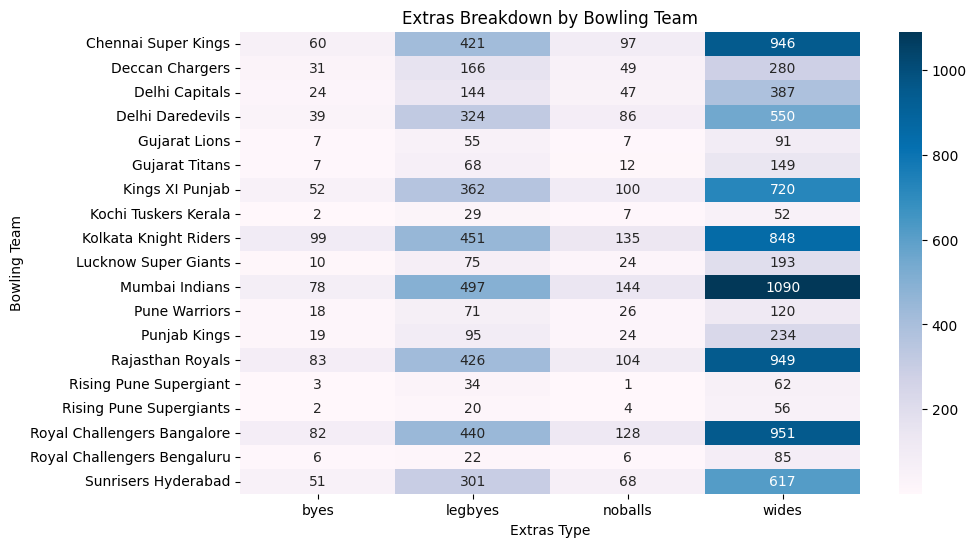

In [ ]:
plt.figure(figsize=(10, 6))

sb.heatmap(extras_by_bowling, annot=True, cmap="PuBu", fmt='d')

plt.title('Extras Breakdown by Bowling Team')
plt.xlabel('Extras Type')
plt.ylabel('Bowling Team')
plt.show()

**Dismissal Types**

In [ ]:
dismissal_types = df[df['is_wicket'] == 1].groupby('dismissal_kind')['is_wicket'].count().reset_index()
print(dismissal_types)


          dismissal_kind  is_wicket
0                 bowled       2212
1                 caught       8063
2      caught and bowled        367
3             hit wicket         15
4                    lbw        800
5  obstructing the field          3
6           retired hurt         15
7            retired out          3
8                run out       1114
9                stumped        358


<ipython-input-38-0fd6d94296e8>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




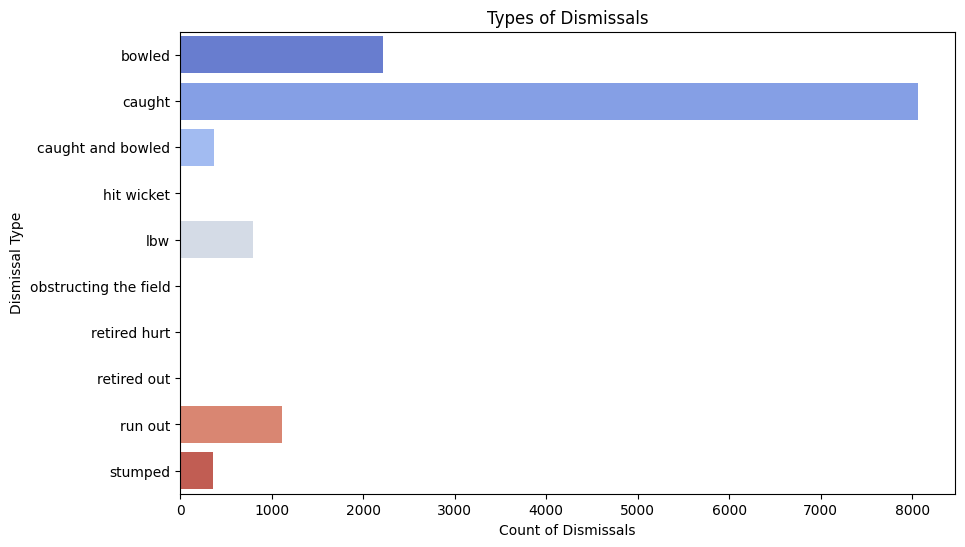

In [ ]:
plt.figure(figsize=(10,6))
sb.barplot(x='is_wicket', y='dismissal_kind', data=dismissal_types, palette='coolwarm')
plt.title('Types of Dismissals')
plt.xlabel('Count of Dismissals')
plt.ylabel('Dismissal Type')
plt.show()

**Team Performance Comparison**

In [ ]:
team_performance = df.groupby('batting_team')['total_runs'].sum().reset_index()
team_performance_sorted = team_performance.sort_values(by='total_runs', ascending=False)
print(team_performance_sorted)

                   batting_team  total_runs
10               Mumbai Indians       42176
8         Kolkata Knight Riders       39331
0           Chennai Super Kings       38629
16  Royal Challengers Bangalore       37692
13             Rajasthan Royals       34747
6               Kings XI Punjab       30064
18          Sunrisers Hyderabad       29071
3              Delhi Daredevils       24296
2                Delhi Capitals       14900
1               Deccan Chargers       11463
12                 Punjab Kings        9536
5                Gujarat Titans        7757
9          Lucknow Super Giants        7510
11                Pune Warriors        6358
4                 Gujarat Lions        4862
17  Royal Challengers Bengaluru        2930
14       Rising Pune Supergiant        2470
15      Rising Pune Supergiants        2063
7          Kochi Tuskers Kerala        1901


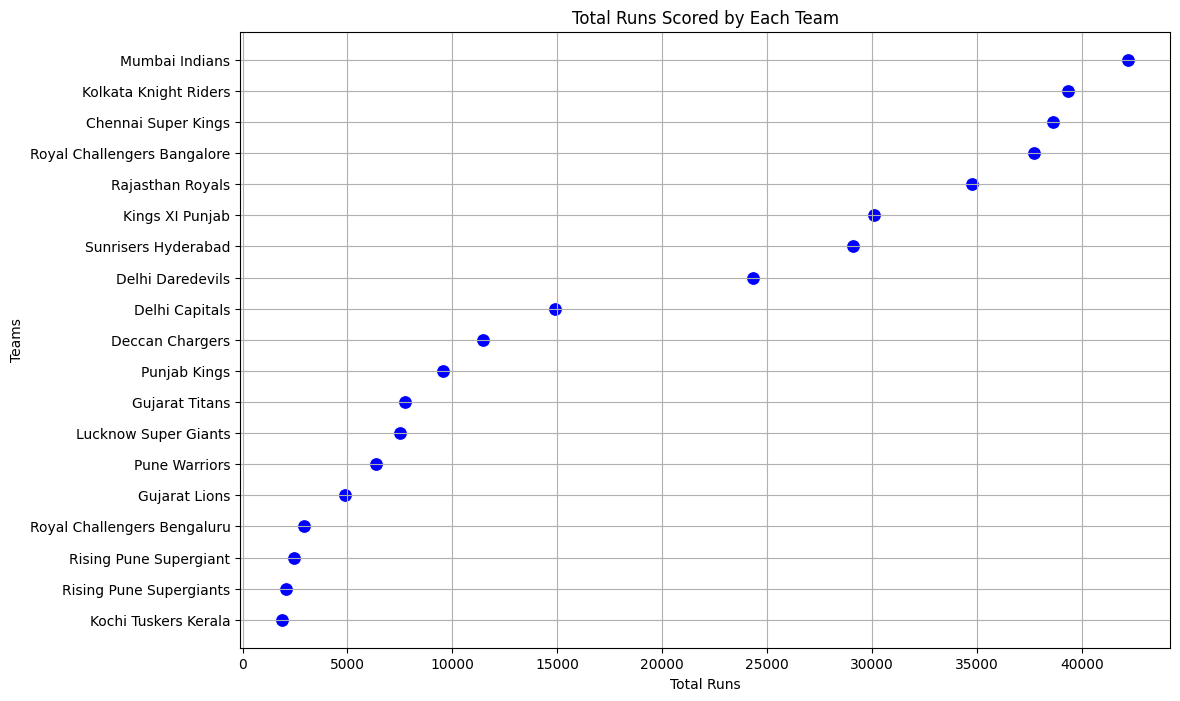

In [ ]:
plt.figure(figsize=(12,8))
sb.scatterplot(x='total_runs', y='batting_team', data=team_performance_sorted, s=100, color='blue')
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Total Runs')
plt.ylabel('Teams')
plt.grid(True)
plt.show()